In [1]:
import os
os.chdir("..")

In [2]:
from echopop import Survey

In [3]:
init_config = "C:/Users/Brandyn Lucca/Documents/GitHub/echopop/config_files/initialization_config.yml"
file_config = "C:/Users/Brandyn Lucca/Documents/GitHub/echopop/config_files/survey_year_2019_config.yml"
survey = Survey(init_config, file_config)
survey.load_survey_data()
survey.load_acoustic_data()
survey.transect_analysis()
survey.fit_variogram()
survey.kriging_analysis(variogram_parameters={"n_lags": 30}, variable="biomass_density")

--------------------------------
TRANSECT RESULTS
--------------------------------
| Variable: Biomass (kmt)
| Age-1 fish excluded: True
| Stratum definition: KS
--------------------------------
GENERAL RESULTS
--------------------------------
| Total biomass: 1651.1 kmt
    Age-1: 7.9 kmt
    Age-2+: 1643.2 kmt
| Total female biomass: 832.2 kmt
    Age-1: 4.0 kmt
    Age-2+: 828.2 kmt
| Total male biomass: 818.5 kmt
    Age-1: 3.9 kmt
    Age-2+: 814.6 kmt
| Total unsexed biomass: 0.4 kmt
| Total mixed biomass: 36.8 kmt
--------------------------------
Longitude and latitude coordinates (WGS84) converted to standardized coordinates (x and y).
-----------------------------
VARIOGRAM OPTIMIZATION
-----------------------------
| See `self.analysis['settings']['variogram']['optimization'] for parameter settings.
-----------------------------
| Variogram model: ['bessel', 'exponential'] (composite family)
-----------------------------
| Initial fit -> Optimized fit
------------------------

## Joint length-age population distributions

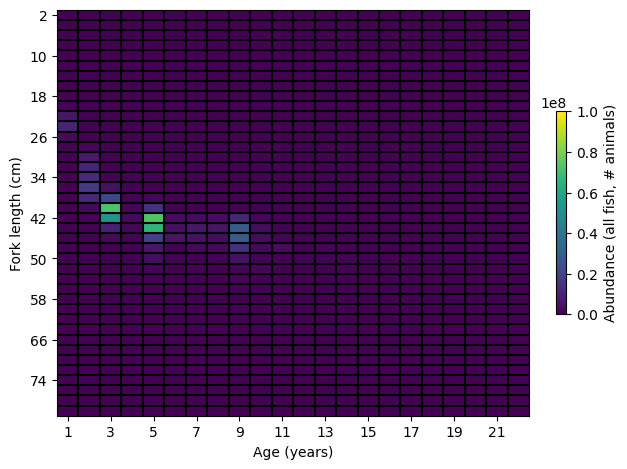

In [4]:
survey.plot(kind="age_length_distribution", variable="abundance")

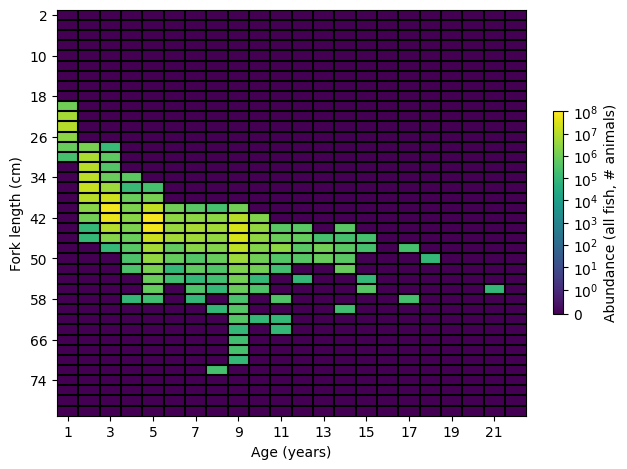

In [5]:
survey.plot(kind="age_length_distribution", variable="abundance", plot_parameters={"log_base": 10})

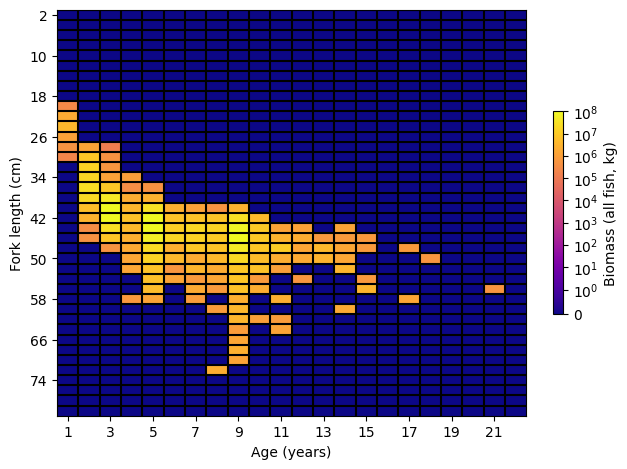

In [7]:
survey.plot(kind="age_length_distribution", variable="biomass", plot_parameters={"log_base": 10})

## Transect

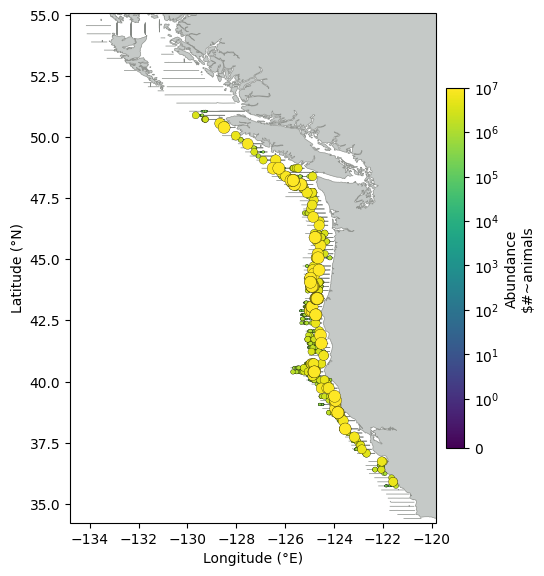

In [10]:
survey.plot(kind="transect", variable="abundance", plot_parameters={"log_base": 10.0})

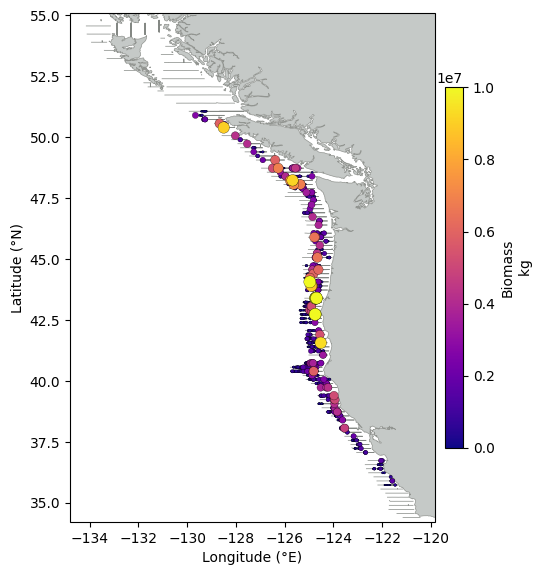

In [11]:
survey.plot(kind="transect", variable="biomass")

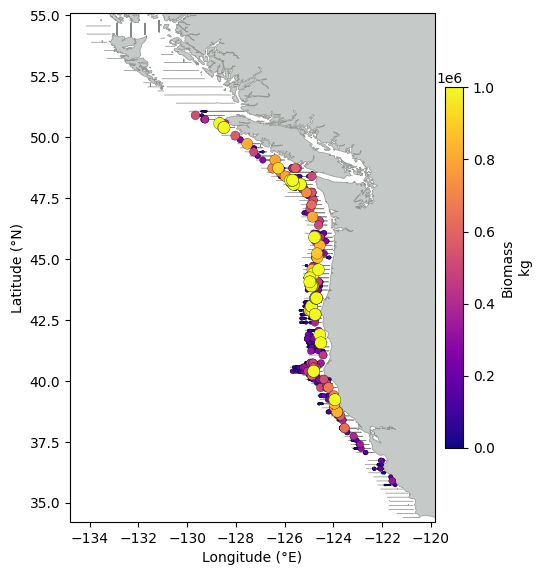

In [12]:
survey.plot(kind="transect", variable="biomass_density")

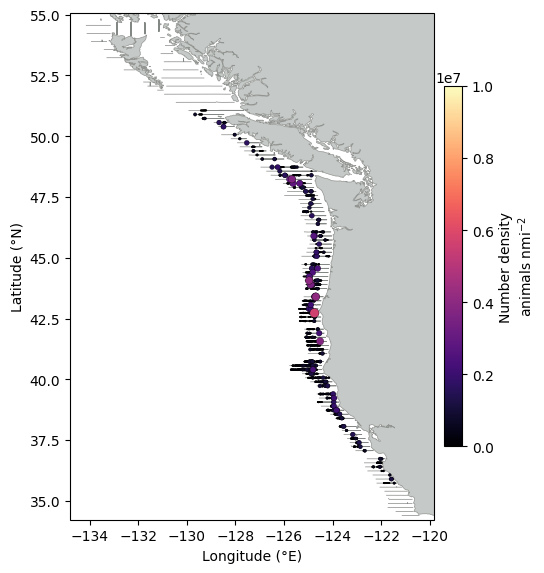

In [13]:
survey.plot(kind="transect", variable="number_density")

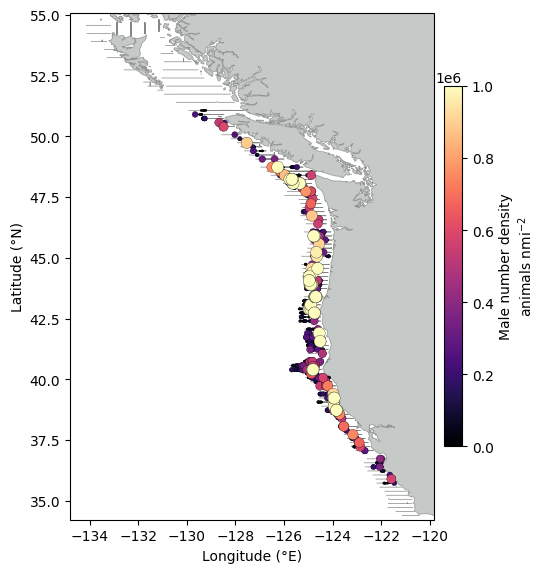

In [14]:
survey.plot(kind="transect", variable="number_density_male")

## Mesh

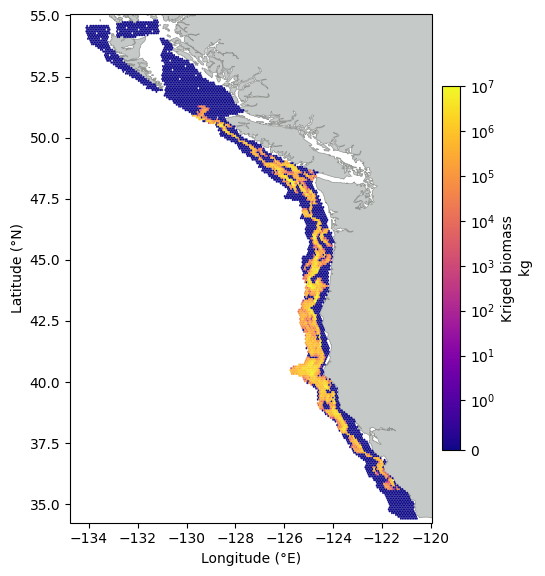

In [16]:
survey.plot(kind="mesh", variable="biomass", plot_type="hexbin", plot_parameters={"log_base": 10})

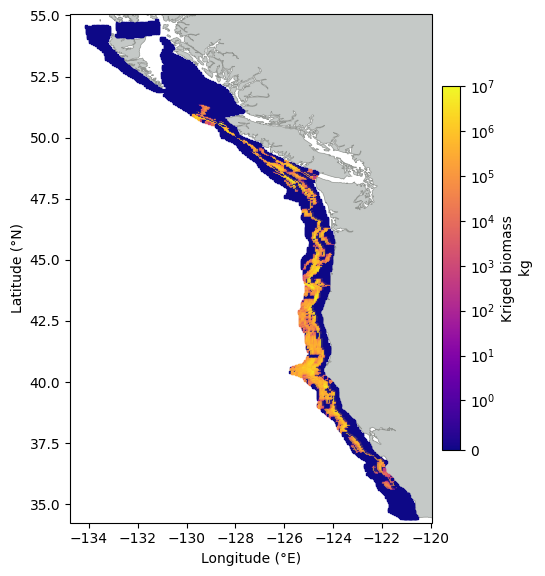

In [17]:
survey.plot(kind="mesh", variable="biomass", plot_type="scatter", plot_parameters={"log_base": 10})

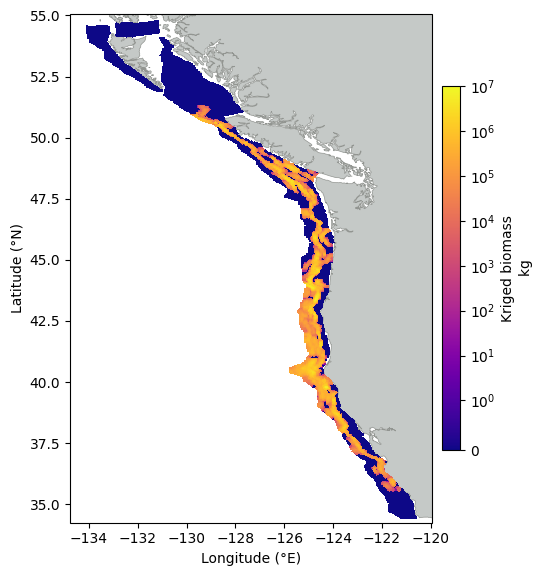

In [18]:
survey.plot(kind="mesh", variable="biomass", plot_type="pcolormesh", plot_parameters={"log_base": 10})

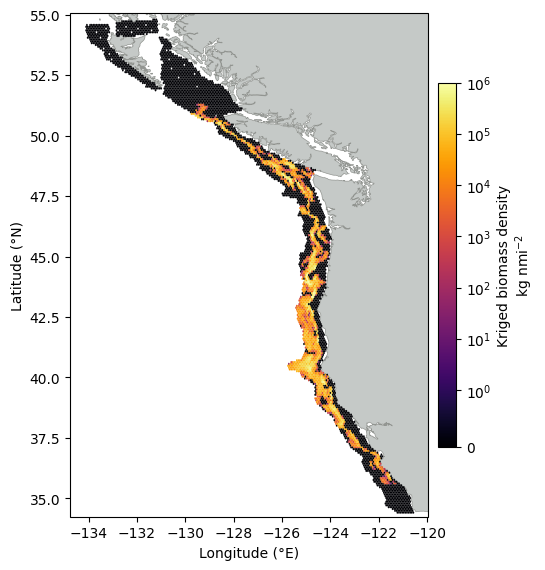

In [20]:
survey.plot(kind="mesh", variable="kriged_mean", plot_parameters={"log_base": 10})

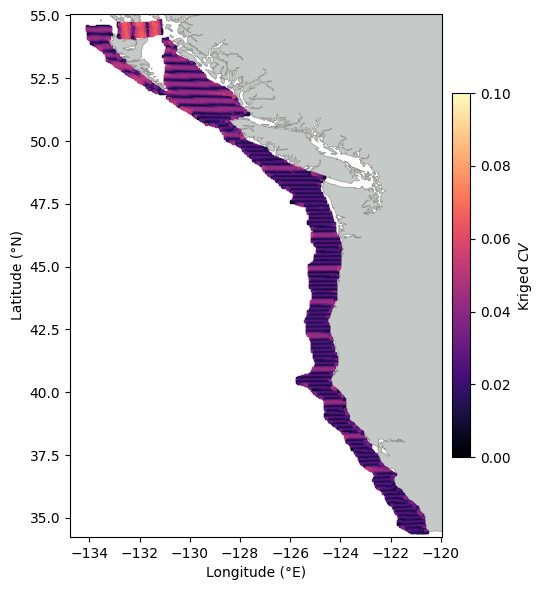

In [22]:
survey.plot(kind="mesh", variable="sample_cv", plot_type="scatter")

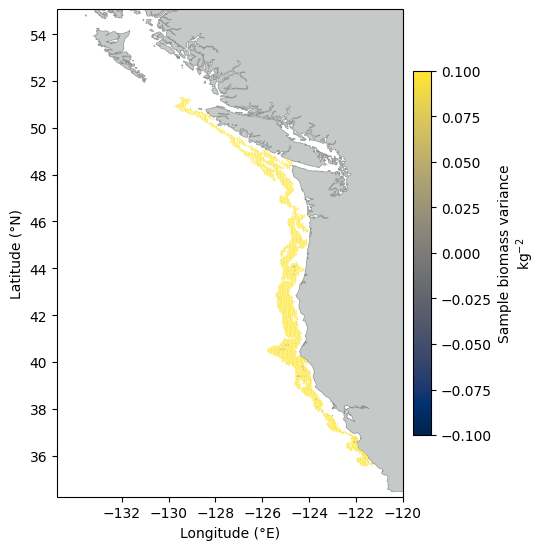

In [23]:
survey.plot(kind="mesh", variable="sample_variance")

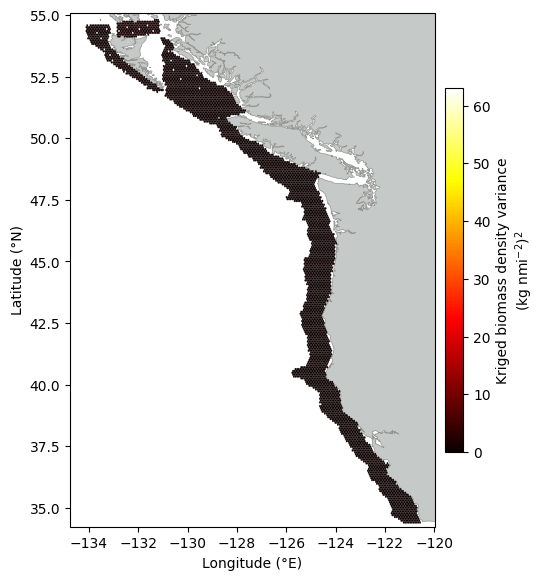

In [24]:
survey.plot(kind="mesh", variable="kriged_variance")

dc